In [29]:
import pandas as pd
import json
import requests
import pickle

drink_url_stem ='https://www.thecocktaildb.com/api/json/v2/9973533/lookup.php?i='
alcohol_api_url = 'https://www.thecocktaildb.com/api/json/v2/9973533/filter.php?a=Alcoholic'

In [25]:
drink_url_stem ='https://www.thecocktaildb.com/api/json/v2/9973533/lookup.php?i='

def cocktail_list_from_cocktail_db():
    f=alcohol_api_url
    data = requests.get(f)    
    parsed_json = json.loads(data.text)   
    drink_dict_list = []
    
    for i in (parsed_json["drinks"]):
        drink_id = i["idDrink"]
        drink_url = drink_url_stem + drink_id
        r_data = requests.get(drink_url)
        drink_dict = r_data.json()['drinks'][0]
        drink_dict_list.append(drink_dict)
    return( drink_dict_list )

cocktail_db_list = cocktail_list_from_cocktail_db() 
#print( cocktail_db_list )  

with open("data/" + "cocktail_db_list.pickle", 'wb') as to_write:
    pickle.dump(cocktail_db_list, to_write)

[{'idDrink': '14029', 'strDrink': "'57 Chevy with a White License Plate", 'strDrinkAlternate': None, 'strDrinkES': None, 'strDrinkDE': None, 'strDrinkFR': None, 'strDrinkZH-HANS': None, 'strDrinkZH-HANT': None, 'strTags': None, 'strVideo': None, 'strCategory': 'Cocktail', 'strIBA': None, 'strAlcoholic': 'Alcoholic', 'strGlass': 'Highball glass', 'strInstructions': '1. Fill a rocks glass with ice 2.add white creme de cacao and vodka 3.stir', 'strInstructionsES': None, 'strInstructionsDE': '1. Füllen Sie ein Rocks Glas mit Eis 2. Geben Sie weiße Creme de Kakao und Wodka hinzu. 3. Umrühren.', 'strInstructionsFR': None, 'strInstructionsZH-HANS': None, 'strInstructionsZH-HANT': None, 'strDrinkThumb': 'https://www.thecocktaildb.com/images/media/drink/qyyvtu1468878544.jpg', 'strIngredient1': 'Creme de Cacao', 'strIngredient2': 'Vodka', 'strIngredient3': None, 'strIngredient4': None, 'strIngredient5': None, 'strIngredient6': None, 'strIngredient7': None, 'strIngredient8': None, 'strIngredient9

In [26]:
with open("data/" + "cocktail_db_list.pickle", 'rb') as to_read:
    cocktail_db_list =  pickle.load(to_read)

In [27]:
 cocktail_db_list

[{'idDrink': '14029',
  'strDrink': "'57 Chevy with a White License Plate",
  'strDrinkAlternate': None,
  'strDrinkES': None,
  'strDrinkDE': None,
  'strDrinkFR': None,
  'strDrinkZH-HANS': None,
  'strDrinkZH-HANT': None,
  'strTags': None,
  'strVideo': None,
  'strCategory': 'Cocktail',
  'strIBA': None,
  'strAlcoholic': 'Alcoholic',
  'strGlass': 'Highball glass',
  'strInstructions': '1. Fill a rocks glass with ice 2.add white creme de cacao and vodka 3.stir',
  'strInstructionsES': None,
  'strInstructionsDE': '1. Füllen Sie ein Rocks Glas mit Eis 2. Geben Sie weiße Creme de Kakao und Wodka hinzu. 3. Umrühren.',
  'strInstructionsFR': None,
  'strInstructionsZH-HANS': None,
  'strInstructionsZH-HANT': None,
  'strDrinkThumb': 'https://www.thecocktaildb.com/images/media/drink/qyyvtu1468878544.jpg',
  'strIngredient1': 'Creme de Cacao',
  'strIngredient2': 'Vodka',
  'strIngredient3': None,
  'strIngredient4': None,
  'strIngredient5': None,
  'strIngredient6': None,
  'strIngre

In [65]:
cocktail_db_df = pd.DataFrame(cocktail_db_list)

In [75]:
reordered_cols = copy.deepcopy(cocktail_db_df.columns)
reordered_cols = [cocktail_db_df.columns[1],cocktail_db_df.columns[0]]
reordered_cols.extend(cocktail_db_df.columns[2:])
reordered_cols
cocktail_db_df = cocktail_db_df[reordered_cols]
cocktail_db_df

,strDrink,idDrink,strDrinkAlternate,strDrinkES,strDrinkDE,strDrinkFR,strDrinkZH-HANS,strDrinkZH-HANT,strTags,strVideo,...,strMeasure10,strMeasure11,strMeasure12,strMeasure13,strMeasure14,strMeasure15,strImageSource,strImageAttribution,strCreativeCommonsConfirmed,dateModified
0,'57 Chevy with a White License Plate,14029,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,No,2016-07-18 22:49:04
1,1-900-FUK-MEUP,15395,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,No,2016-07-18 22:27:04
2,110 in the shade,15423,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,No,2016-02-03 14:51:57
3,151 Florida Bushwacker,14588,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,No,2016-07-18 22:28:43
4,155 Belmont,15346,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,No,2016-10-05 12:36:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,Zizi Coin-coin,14594,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,No,2017-01-28 16:25:52
541,Zoksel,15691,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,No,2017-01-28 16:28:50
542,Zombie,17241,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,No,2017-11-01 17:35:26
543,Zorbatini,16963,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,No,2017-01-28 16:32:35


,strDrink,idDrink,strDrinkAlternate,strDrinkES,strDrinkDE,strDrinkFR,strDrinkZH-HANS,strDrinkZH-HANT,strTags,strVideo,...,strMeasure10,strMeasure11,strMeasure12,strMeasure13,strMeasure14,strMeasure15,strImageSource,strImageAttribution,strCreativeCommonsConfirmed,dateModified
146,Bloody Mary,11113,None,None,None,None,None,None,"IBA,ContemporaryClassic",None,...,None,None,None,None,None,None,https://www.thecocktaildb.com/drink/11113-Bloo...,TheCocktialDB.com,Yes,2015-08-18 15:09:14
358,Mary Pickford,17188,None,None,None,None,None,None,"IBA,Classic",https://www.youtube.com/watch?v=fw9C11NOI70,...,None,None,None,None,None,None,None,None,No,2017-09-02 12:09:17


In [79]:
ingredient_columns = ['strIngredient' + str(num) for num in range(1,16)]
cocktail_db_df_melt = cocktail_db_df.melt(id_vars='strDrink', value_vars=ingredient_columns)
cocktail_db_df_melt 

,strDrink,variable,value
0,'57 Chevy with a White License Plate,strIngredient1,Creme de Cacao
1,1-900-FUK-MEUP,strIngredient1,Absolut Kurant
2,110 in the shade,strIngredient1,Lager
3,151 Florida Bushwacker,strIngredient1,Malibu rum
4,155 Belmont,strIngredient1,Dark rum
...,...,...,...
8170,Zizi Coin-coin,strIngredient15,None
8171,Zoksel,strIngredient15,None
8172,Zombie,strIngredient15,None
8173,Zorbatini,strIngredient15,None


In [466]:
cocktail_db_df_melt[cocktail_db_df_melt['strDrink']=='Bloody Mary']
#cocktail_db_df_melt[cocktail_db_df_melt['StrDrink'].str.contains('mary')]

,strDrink,variable,value
146,Bloody Mary,strIngredient1,Vodka
691,Bloody Mary,strIngredient2,Tomato juice
1236,Bloody Mary,strIngredient3,Lemon juice
1781,Bloody Mary,strIngredient4,Worcestershire sauce
2326,Bloody Mary,strIngredient5,Tabasco sauce
2871,Bloody Mary,strIngredient6,Lime


In [121]:
cocktail_db_df_melt = cocktail_db_df_melt[~pd.isnull(cocktail_db_df_melt['value'])]
cocktail_db_df_melt = cocktail_db_df_melt[cocktail_db_df_melt['value']!='']
cocktail_db_df_melt.drop(['variable'], axis=1).reindex()

,strDrink,value
0,'57 Chevy with a White License Plate,Creme de Cacao
1,1-900-FUK-MEUP,Absolut Kurant
2,110 in the shade,Lager
3,151 Florida Bushwacker,Malibu rum
4,155 Belmont,Dark rum
...,...,...
4977,Amaretto Liqueur,Food coloring
4991,Angelica Liqueur,Water
5522,Amaretto Liqueur,Glycerine
5536,Angelica Liqueur,Food coloring


In [176]:
cocktail_ingredients = cocktail_db_df_melt['value'].value_counts()
cocktail_ingredients_df = pd.DataFrame(cocktail_db_df_melt['value'].value_counts()).reset_index()

In [ ]:
cocktail_ingredients_df['in_cocktail'] = True
cocktail_ingredients_df.rename(columns={'index':'name'}, inplace=True)

,name,value,in_cocktail,words,ingredient
199,Rosemary,2,True,[Rosemary],rosemary
319,Rosemary Syrup,1,True,"[Rosemary, Syrup]",rosemary


In [309]:

words = ' '.join([i for i in cocktail_ingredients_df['name']]).split()
words = pd.Series(words).value_counts()
words[310:] 

irish           1
Dry             1
melon           1
Kummel          1
Corn            1
Jägermeister    1
tea             1
Aperol          1
Advocaat        1
Turkey          1
Lavender        1
Flakes          1
Salted          1
Jagermeister    1
Anis            1
Butterscotch    1
Bacardi         1
Salt            1
powder          1
tequila         1
Mure            1
Jello           1
Condensed       1
Ale             1
Limeade         1
Ice             1
sour            1
Blue            1
Yukon           1
Pernod          1
Food            1
punch           1
Roses           1
Glycerine       1
Rumple          1
dtype: int64

In [310]:
word_list = words.index
word_list[100:150]

Index(['Triple', 'fruit', 'extract', 'Peppermint', 'Almond', 'Tomato', 'Wine',
       'Cacao', 'and', 'Beer', 'Pink', 'Black', 'Cucumber', 'Anisette', 'Port',
       'Amaretto', 'Tea', 'Marnier', 'Crown', 'Brine', 'Pisco', 'Blackberry',
       'stout', 'Passoa', 'Sarsaparilla', 'nectar', 'Erin', 'Sirup', 'Añejo',
       'Milk', 'Sec', 'Daiquiri', 'Cognac', 'Powdered', 'Royal', 'Everclear',
       'lemonade', 'cookie', 'Peachtree', 'Dew', 'Johnnie', 'Gin', 'Cocoa',
       'squash', 'Basil', 'Blanc', 'Tabasco', 'Heering', 'Absinthe', 'Cassis'],
      dtype='object')

In [467]:
generic_words = list({' and ', ' de ', ' of', ' sour', 'bitters', 'black ', 'blended', 'brown ', 'coloring', \
                       'cordial', 'creme', 'dry','extract', 'flakes', 'flavoring', 'food', 'fresh', \
                       'green', 'leaf', 'leaves', 'light', 'liqueur', 'mix', 'nectar',\
                       ' of ', 'blended', 'peel', 'pink', 'powdered', 'red ', 'root', 'sauce', 'seeds', \
                       'sirup', 'soda', 'sour', 'st.', 'sweetened', 'syrup',  ' water', 'whipped', \
                       'whipped', 'white '})

generic_words = [word.lower() for word in generic_words]


In [468]:
generic_words = sorted(generic_words)
generic_words

[' and ',
 ' de ',
 ' of',
 ' of ',
 ' sour',
 ' water',
 'bitters',
 'black ',
 'blended',
 'brown ',
 'coloring',
 'cordial',
 'creme',
 'dry',
 'extract',
 'flakes',
 'flavoring',
 'food',
 'fresh',
 'green',
 'leaf',
 'leaves',
 'light',
 'liqueur',
 'mix',
 'nectar',
 'peel',
 'pink',
 'powdered',
 'red ',
 'root',
 'sauce',
 'seeds',
 'sirup',
 'soda',
 'sour',
 'st.',
 'sweetened',
 'syrup',
 'whipped',
 'white ']

In [469]:
cocktail_ingredients_df


,name,value,in_cocktail,words,ingredient
0,Gin,101,True,[Gin],gin
1,Vodka,94,True,[Vodka],vodka
2,Sugar,51,True,[Sugar],sugar
3,Orange juice,50,True,"[Orange, juice]",orange
4,Lemon,44,True,[Lemon],lemon
...,...,...,...,...,...
361,Coconut milk,1,True,"[Coconut, milk]",coconut milk
362,Marjoram leaves,1,True,"[Marjoram, leaves]",marjoram
363,Elderflower cordial,1,True,"[Elderflower, cordial]",elderflower
364,Tropicana,1,True,[Tropicana],tropicana


### 1. Write routine to extract generic words out of cocktail ingredients, and puts to lowercase

In [470]:
def remove_words( s, word_list ):
    s=s.lower()
    for word in word_list:
        s = s.replace(word.lower(), '')
    return s

cleaned_string = remove_words("orange juice", generic_words)
cleaned_string

'orange juice'

In [471]:
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['name'].apply(lambda s: remove_words(s, generic_words))

In [472]:
cocktail_ingredients_df.iloc[350:, :]

,name,value,in_cocktail,words,ingredient
350,Vanilla,1,True,[Vanilla],vanilla
351,Cucumber,1,True,[Cucumber],cucumber
352,Firewater,1,True,[Firewater],firewater
353,Lime peel,1,True,"[Lime, peel]",lime
354,Coconut syrup,1,True,"[Coconut, syrup]",coconut
355,Oreo cookie,1,True,"[Oreo, cookie]",oreo cookie
356,Condensed milk,1,True,"[Condensed, milk]",condensed milk
357,Raspberry vodka,1,True,"[Raspberry, vodka]",raspberry vodka
358,Pink lemonade,1,True,"[Pink, lemonade]",lemonade
359,Falernum,1,True,[Falernum],falernum


### 2. As done with cocktail ingredients, write a routine that streamlines the names of foods in the foods dataframe 

In [401]:
foods_df['name']=foods_df['name'].str.lower()
foods_df.sample(50)

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id,in_some_cocktail
260,261,daikon radish,Raphanus sativus var. longipinnatus,"Daikon, mooli, or white radish is a mild-flavo...",NaN,Daikon,261.jpg,image/jpeg,22915.0,2012-04-20 09:44:04 UTC,...,2011-02-09 00:37:29 UTC,2019-05-14 18:04:21 UTC,NaN,NaN,False,specific,41679.0,True,FOOD00261,False
468,479,sesbania flower,Sesbania bispinosa,"The legume Sesbania bispinosa, also known as S...",505187.0,Sesbania_bispinosa,479.jpg,image/jpeg,144173.0,2012-04-20 09:40:59 UTC,...,2011-02-09 00:37:44 UTC,2019-05-14 18:05:25 UTC,NaN,NaN,False,specific,485725.0,True,FOOD00469,False
629,647,port wine,NaN,"Port wine (also known as Vinho do Porto, Portu...",NaN,Port_wine,647.jpg,image/jpeg,66694.0,2012-04-20 09:35:39 UTC,...,2011-12-02 22:15:28 UTC,2019-05-14 18:05:29 UTC,2.0,2.0,False,specific,NaN,True,FOOD00630,False
789,815,natto,NaN,Natto is a traditional Japanese food made from...,NaN,Natto,815.jpg,image/jpeg,85558.0,2012-04-20 09:29:17 UTC,...,2011-12-19 22:02:14 UTC,2019-05-14 18:05:32 UTC,2.0,2.0,False,specific,NaN,False,FOOD00790,False
123,124,common oregano,Origanum vulgare,Oregano (scientific name Origanum vulgare) is ...,32632.0,Oregano,124.jpg,image/jpeg,45859.0,2012-04-20 09:28:53 UTC,...,2011-02-09 00:37:21 UTC,2019-05-14 18:04:16 UTC,NaN,NaN,False,specific,39352.0,True,FOOD00124,False
208,209,bayberry,Myrica,Myrica is a genus of about 35?50 species of sm...,19260.0,Bayberry,209.jpg,image/jpeg,28634.0,2012-04-20 09:33:24 UTC,...,2011-02-09 00:37:26 UTC,2019-05-14 18:04:19 UTC,NaN,2.0,False,specific,3509.0,True,FOOD00209,False
15,16,peanut,Arachis hypogaea,"The peanut, also known as the groundnut and th...",26463.0,Mr. Peanut,16.jpg,image/jpeg,285702.0,2012-04-20 09:29:07 UTC,...,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,3818.0,True,FOOD00016,False
580,595,mountain hare,Lepus timidus,"""The mountain hare (Lepus timidus), also known...",180113.0,Mountain_hare,595.jpg,image/jpeg,69805.0,NaN,...,2018-01-18 03:18:03 UTC,2019-05-14 18:05:28 UTC,NaN,NaN,False,specific,62621.0,True,FOOD00581,False
979,1012,wampee,Clausena lansium,"Clausena lansium, also known as wampee or wamp...",NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24 17:05:37 UTC,2020-01-24 17:05:37 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00980,False
154,155,blackcurrant,Ribes nigrum,"Blackcurrant, with the scientific name Ribes n...",24488.0,Blackcurrant,155.jpg,image/jpeg,92534.0,2012-04-20 09:30:10 UTC,...,2011-02-09 00:37:23 UTC,2019-05-14 18:04:17 UTC,NaN,NaN,False,specific,78511.0,True,FOOD00155,True


### 3. Write a function that can check if any of the words in a string are in the pared down cocktail ingredients word list. It should also mark in the cocktail ingredient ingredients dataframe whether an ingredient is found to match the other dataframe

In [485]:
def is_ingredient( food_item ):
    found = False
    if (cocktail_ingredients_df['ingredient'].str.contains(food_item).any()):
        found = True
    elif ('common ' + cocktail_ingredients_df['ingredient']).str.contains(food_item).any():
        found = True
#     elif cocktail_ingredients_df['ingredient'].any() in food_item:
#         found = True                  
    return found

#is_ingredient(foods_df.iloc[11, :]['name'])
#is_ingredient('passion fruit')

### 4. Apply this function to populate a new `in_cocktail` column in the foods dataframe

In [486]:
foods_df['in_some_cocktail'] = foods_df['name'].apply(lambda name_string: is_ingredient(name_string))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [487]:
foods_df[foods_df['in_some_cocktail']==True]

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id,in_some_cocktail
0,1,angelica,Angelica keiskei,Angelica is a genus of about 60 species of tal...,NaN,Angelica,1.jpg,image/jpeg,111325.0,2012-04-20 09:29:57 UTC,...,2011-02-09 00:37:14 UTC,2019-05-14 18:04:13 UTC,NaN,2.0,False,specific,357850.0,True,FOOD00001,True
3,4,kiwi,Actinidia chinensis,"The kiwifruit, often shortened to kiwi in many...",506775.0,Kiwifruit,4.jpg,image/jpeg,110661.0,2012-04-20 09:32:21 UTC,...,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,3625.0,True,FOOD00004,True
11,12,pineapple,Ananas comosus,"The Pineapple (Ananas comosus), named for its ...",42335.0,Pineapple,12.jpg,image/jpeg,46902.0,2012-04-20 09:38:46 UTC,...,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,4615.0,True,FOOD00012,True
28,29,rape,Brassica napus var. napus,"Rapeseed (Brassica napus), also known as rape,...",530955.0,Rapeseed,29.jpg,image/jpeg,107459.0,2012-04-20 09:32:03 UTC,...,2011-02-09 00:37:16 UTC,2019-05-14 18:04:14 UTC,NaN,NaN,False,specific,138011.0,True,FOOD00029,True
37,38,tea,Camellia sinensis,Tea is an aromatic beverage commonly prepared ...,506801.0,Tea,38.jpg,image/jpeg,52986.0,2012-04-20 09:36:34 UTC,...,2011-02-09 00:37:17 UTC,2019-12-11 19:31:59 UTC,NaN,2.0,False,specific,4442.0,False,FOOD00038,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,788,fruit juice,NaN,Juice is the liquid that is naturally containe...,NaN,Juice,788.jpg,image/jpeg,125913.0,2012-04-20 09:39:14 UTC,...,2011-12-16 22:43:15 UTC,2020-03-16 16:32:15 UTC,2.0,2.0,False,specific,NaN,False,FOOD00763,True
841,871,condensed milk,NaN,Condensed milk is cow's milk from which water ...,NaN,Condensed_milk,871.jpg,image/jpeg,29385.0,2012-04-20 09:30:31 UTC,...,2011-12-22 19:16:21 UTC,2019-05-14 18:05:34 UTC,2.0,2.0,False,specific,NaN,True,FOOD00842,True
905,938,blackberry,Rubus,The blackberry is an edible fruit produced by ...,NaN,Blackberry,blackberry.jpg,image/jpeg,387007.0,2019-08-22 22:55:51 UTC,...,2019-08-22 22:55:52 UTC,2020-03-12 21:01:01 UTC,NaN,NaN,False,specific,NaN,True,FOOD00906,True
918,951,egg yolk,NaN,The egg yolk is the yellow center of an egg. I...,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24 17:05:36 UTC,2020-01-24 17:05:36 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00919,True


In [431]:
non_cocktail_foods = foods_df[foods_df['in_some_cocktail']==False]
non_cocktail_foods.sample(50)

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id,in_some_cocktail
523,535,deer,Cervidae,Deer (singular and plural) are the ruminant ma...,180693.0,Deer,535.jpg,image/jpeg,114690.0,NaN,...,2018-01-18 03:18:03 UTC,2019-05-14 18:05:26 UTC,NaN,NaN,False,specific,9850.0,True,FOOD00524,False
195,196,common verbena,Verbena officinalis,"Verbena officinalis, the Common Vervain or Com...",32110.0,Verbena officinalis,196.jpg,image/jpeg,86786.0,2012-04-20 09:43:51 UTC,...,2011-02-09 00:37:25 UTC,2019-05-14 18:04:18 UTC,NaN,NaN,False,specific,79772.0,True,FOOD00196,False
847,878,milk substitute,NaN,A milk substitute is a liquid that replaces mi...,NaN,Milk_substitute,878.jpg,image/jpeg,42023.0,2012-04-20 09:34:20 UTC,...,2011-12-22 22:26:59 UTC,2019-05-14 18:05:35 UTC,2.0,2.0,False,specific,NaN,False,FOOD00848,False
793,819,succotash,NaN,Succotash is a food dish consisting primarily ...,NaN,Succotash,819.jpg,image/jpeg,903077.0,2012-04-20 09:39:52 UTC,...,2011-12-19 22:26:12 UTC,2019-05-14 18:05:32 UTC,2.0,2.0,False,specific,NaN,False,FOOD00794,False
183,184,linden,Tilia,<i>Tilia</i> is a genus of about 30 species of...,21535.0,NaN,184.jpg,image/jpeg,83579.0,2012-04-20 09:36:55 UTC,...,2011-02-09 00:37:24 UTC,2019-05-14 18:04:18 UTC,NaN,NaN,False,specific,64580.0,True,FOOD00184,False
56,57,sweet orange,Citrus sinensis,"The orange (specifically, the sweet orange) is...",28889.0,Sweet_orange,57.jpg,image/jpeg,110752.0,2012-04-20 09:36:15 UTC,...,2011-02-09 00:37:18 UTC,2019-05-14 18:04:15 UTC,NaN,NaN,False,specific,2711.0,True,FOOD00057,False
38,39,capers,Capparis spinosa,"Capparis spinosa, the caper bush, also called ...",505885.0,Capers,39.jpg,image/jpeg,31305.0,2012-04-20 09:32:22 UTC,...,2011-02-09 00:37:17 UTC,2019-05-14 18:04:14 UTC,NaN,NaN,False,specific,65558.0,True,FOOD00039,False
656,677,meat bouillon,NaN,NaN,NaN,NaN,677.jpg,image/jpeg,61693.0,2012-04-20 09:43:50 UTC,...,2011-12-05 17:46:06 UTC,2019-05-14 18:05:29 UTC,2.0,2.0,False,specific,NaN,False,FOOD00657,False
146,147,european plum,Prunus domestica,Prunus domestica (sometimes referred to as Pru...,24774.0,Prunus_domestica,147.jpg,image/jpeg,93265.0,2012-04-20 09:38:56 UTC,...,2011-02-09 00:37:22 UTC,2019-05-14 18:04:17 UTC,NaN,NaN,False,specific,3758.0,True,FOOD00147,False
390,396,kelp,Laminaria,Kelps are large seaweeds (algae) belonging to ...,11217.0,Kelp,396.jpg,image/jpeg,180039.0,2012-04-20 09:32:35 UTC,...,2011-02-09 00:37:39 UTC,2019-05-14 18:05:24 UTC,NaN,NaN,False,specific,33637.0,True,FOOD00391,False


#### Add `wine` and `alcohonic beverages` to items that can go in a cocktail.

In [437]:
non_cocktail_foods[non_cocktail_foods['name'].str.contains('alcoholic')]

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id,in_some_cocktail
277,279,other alcoholic beverage,NaN,NaN,NaN,Alcoholic_beverage,279.jpg,image/jpeg,73939.0,2012-04-20 09:43:36 UTC,...,2011-02-09 00:37:30 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,False,FOOD00278,False
853,884,alcoholic beverages,NaN,An alcoholic beverage is a drink that typicall...,NaN,Alcoholic_beverages,NaN,NaN,NaN,NaN,...,2012-09-11 14:54:38 UTC,2019-12-11 19:38:46 UTC,2.0,2.0,False,generic,NaN,False,FOOD00854,False


In [445]:
foods_df.loc[foods_df['name'].str.contains('alcoholic'),'in_some_cocktail']=True

In [446]:
foods_df[foods_df['name'].str.contains('alcoholic')]

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id,in_some_cocktail
277,279,other alcoholic beverage,NaN,NaN,NaN,Alcoholic_beverage,279.jpg,image/jpeg,73939.0,2012-04-20 09:43:36 UTC,...,2011-02-09 00:37:30 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,False,FOOD00278,True
853,884,alcoholic beverages,NaN,An alcoholic beverage is a drink that typicall...,NaN,Alcoholic_beverages,NaN,NaN,NaN,NaN,...,2012-09-11 14:54:38 UTC,2019-12-11 19:38:46 UTC,2.0,2.0,False,generic,NaN,False,FOOD00854,True


In [447]:
foods_df.loc[foods_df['name'].str.contains('wine'),'in_some_cocktail']=True
foods_df[foods_df['name'].str.contains('wine')]

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id,in_some_cocktail
276,278,fortified wine,NaN,Fortified wine is wine with an added distilled...,NaN,Fortified wine,278.jpg,image/jpeg,40686.0,2012-04-20 09:33:36 UTC,...,2011-02-09 00:37:30 UTC,2019-12-11 19:32:37 UTC,NaN,2.0,False,specific,NaN,False,FOOD00277,True
611,626,grape wine,NaN,Wine is an alcoholic beverage made from fermen...,NaN,Grape_wine,626.jpg,image/jpeg,24988.0,2012-04-20 09:29:56 UTC,...,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00612,True
612,627,berry wine,NaN,NaN,NaN,NaN,627.jpg,image/jpeg,16358.0,2012-04-20 09:34:03 UTC,...,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00613,True
613,628,other wine,NaN,NaN,NaN,NaN,628.jpg,image/jpeg,55077.0,2012-04-20 09:37:43 UTC,...,2011-02-09 00:37:52 UTC,2019-12-11 19:37:56 UTC,NaN,2.0,False,specific,NaN,False,FOOD00614,True
629,647,port wine,NaN,"Port wine (also known as Vinho do Porto, Portu...",NaN,Port_wine,647.jpg,image/jpeg,66694.0,2012-04-20 09:35:39 UTC,...,2011-12-02 22:15:28 UTC,2019-05-14 18:05:29 UTC,2.0,2.0,False,specific,NaN,True,FOOD00630,True
632,650,madeira wine,NaN,Madeira is a fortified Portuguese wine made in...,NaN,Madeira_wine,650.jpg,image/jpeg,46719.0,2012-04-20 09:41:52 UTC,...,2011-12-02 22:19:24 UTC,2019-05-14 18:05:29 UTC,2.0,2.0,False,specific,NaN,True,FOOD00633,True
910,943,red wine,NaN,Red wine is a type of wine made from dark-colo...,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24 17:05:36 UTC,2020-01-24 17:05:36 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00911,True
916,949,white wine,NaN,White wine is a wine that is fermented without...,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24 17:05:36 UTC,2020-01-24 17:05:36 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00917,True
919,952,rosé wine,NaN,Rosé wine is a kind of wine. It is made from r...,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24 17:05:36 UTC,2020-01-24 17:05:36 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00920,True
922,955,dessert wine,NaN,"Dessert wines, sometimes called pudding wines,...",NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24 17:05:36 UTC,2020-01-24 17:05:36 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00923,True


In [483]:
foods_df[foods_df['name'].str.contains('extract')]

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id,in_some_cocktail


### 5. Recode the content of the `food_group` and `food_subgroup` columns

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id,in_some_cocktail
277,279,other alcoholic beverage,NaN,NaN,NaN,Alcoholic_beverage,279.jpg,image/jpeg,73939.0,2012-04-20 09:43:36 UTC,...,2011-02-09 00:37:30 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,False,FOOD00278,False
853,884,alcoholic beverages,NaN,An alcoholic beverage is a drink that typicall...,NaN,Alcoholic_beverages,NaN,NaN,NaN,NaN,...,2012-09-11 14:54:38 UTC,2019-12-11 19:38:46 UTC,2.0,2.0,False,generic,NaN,False,FOOD00854,False


In [454]:
foods_df[foods_df['name'].str.contains('vegetable')]

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id,in_some_cocktail
670,693,other vegetable product,NaN,NaN,NaN,NaN,693.jpg,image/jpeg,3855.0,2012-04-20 09:32:35 UTC,...,2011-12-06 16:50:36 UTC,2019-05-14 18:05:29 UTC,2.0,2.0,False,specific,NaN,False,FOOD00671,False
821,851,vegetable juice,NaN,Vegetable juice is a drink made primarily of b...,NaN,Vegetable juice,851.jpg,image/jpeg,134878.0,2012-04-20 09:32:02 UTC,...,2011-12-21 00:03:05 UTC,2019-05-14 18:05:33 UTC,2.0,2.0,False,specific,NaN,True,FOOD00822,False
854,885,onion-family vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2012-09-11 14:56:18 UTC,2019-12-11 19:38:51 UTC,2.0,2.0,False,generic,NaN,False,FOOD00855,False
871,904,green vegetables,NaN,"Leaf vegetables, also called potherbs, greens,...",NaN,Green_vegetables,NaN,NaN,NaN,NaN,...,2012-09-11 15:28:06 UTC,2019-12-11 19:41:16 UTC,2.0,2.0,False,generic,NaN,False,FOOD00872,False
872,905,root vegetables,NaN,Root vegetables are plant roots used as vegeta...,NaN,Root_vegetables,NaN,NaN,NaN,NaN,...,2012-09-11 15:29:35 UTC,2019-12-11 19:41:44 UTC,2.0,2.0,False,generic,NaN,False,FOOD00873,False


In [491]:
foods_df.columns

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at', 'legacy_id', 'food_group',
       'food_subgroup', 'food_type', 'created_at', 'updated_at', 'creator_id',
       'updater_id', 'export_to_afcdb', 'category', 'ncbi_taxonomy_id',
       'export_to_foodb', 'public_id', 'in_some_cocktail'],
      dtype='object')

In [513]:
food_and_feature_columns = ['id','name', 'food_group', 'food_subgroup', 'food_type','in_some_cocktail']

In [499]:
foods_df[foods_df['food_subgroup'].isnull() ][['name', 'food_group','food_subgroup', 'food_type']]

,name,food_group,food_subgroup,food_type
892,castanospermum australe,Vegetables,NaN,Type 1
893,gentiana lutea,Vegetables,NaN,Type 1
894,juniperus communis,Vegetables,NaN,Type 1
895,albizia gummifera,Vegetables,NaN,Type 1
989,fish oil,NaN,NaN,Type 1
990,taco shell,NaN,NaN,Type 2
991,tostada shell,NaN,NaN,Type 2


In [502]:
foods_df[foods_df['name'].str.contains('oil')][food_and_feature_columns]

,id,name,food_group,food_subgroup,food_type
590,605,oil palm,Herbs and Spices,Oilseed crops,Type 1
775,801,oil-seed camellia,Herbs and Spices,Oilseed crops,Type 1
778,804,cooking oil,Baking goods,Baking goods,Type 2
863,894,fats and oils,Fats and oils,Fats and oils,Unknown
908,941,olive oil,Herbs and Spices,Oilseed crops,Type 2
911,944,linseed oil,Herbs and Spices,Oilseed crops,Type 2
912,945,rapeseed oil,Herbs and Spices,Oilseed crops,Type 2
913,946,soybean oil,Herbs and Spices,Oilseed crops,Type 2
921,954,canola oil,Herbs and Spices,Oilseed crops,Type 2
939,972,sunflower oil,Herbs and Spices,Oilseed crops,Type 2


In [505]:
foods_df.loc[foods_df['food_group']=='Vegetables', 'food_subgroup'] = 'Vegetables'

In [515]:
foods_df.loc[foods_df['name']=='fish oil', 'food_subgroup'] = 'Fats and oils'
foods_df.loc[foods_df['name']=='fish oil', 'food_group'] = 'Fats and oils'

In [508]:
foods_df[foods_df['name'].str.contains('tortilla')][food_and_feature_columns]

,id,name,food_group,food_subgroup,food_type
708,733,tortilla,Cereals and cereal products,Flat breads,Type 2
720,746,tortilla chip,Snack foods,Snack foods,Type 2


In [511]:
foods_df.loc[foods_df['name']=='taco shell', 'food_group'] = 'Cereals and cereal products'
foods_df.loc[foods_df['name']=='tostada shell', 'food_group'] = 'Cereals and cereal products'
foods_df.loc[foods_df['name']=='taco shell', 'food_subgroup'] = 'Flat breads'
foods_df.loc[foods_df['name']=='tostada shell', 'food_subgroup'] = 'Flat breads'

In [516]:
foods_df[food_and_feature_columns]

,id,name,food_group,food_subgroup,food_type,in_some_cocktail
0,1,angelica,Herbs and Spices,Herbs,Type 1,True
1,2,savoy cabbage,Vegetables,Vegetables,Type 1,False
2,3,silver linden,Herbs and Spices,Herbs,Type 1,False
3,4,kiwi,Fruits,Tropical fruits,Type 1,True
4,5,allium,Vegetables,Vegetables,Type 1,False
...,...,...,...,...,...,...
987,1020,cape gooseberry,Fruits,Berries,Type 1,False
988,1021,herbal tea,Teas,Teas,Type 1,False
989,1022,fish oil,Fats and oils,Fats and oils,Type 1,False
990,1023,taco shell,Cereals and cereal products,Flat breads,Type 2,False


In [532]:
df_foods = foods_df[food_and_feature_columns]

###  6. Train-test-split the food dataframe

In [704]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)


from sklearn.model_selection import train_test_split

In [705]:
df_foods.loc[:, 'in_some_cocktail'] = df_foods['in_some_cocktail'].astype('category')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [717]:
df_train_val, df_test = train_test_split(df_foods,
                                     test_size=0.2, 
                                     random_state=42)

False    0.928121
True     0.071879
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

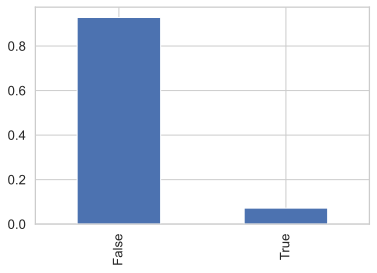

In [718]:
target_pcts = df_train_val['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

False    0.939698
True     0.060302
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

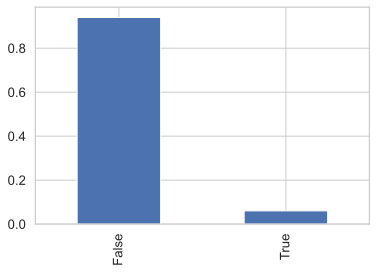

In [720]:
target_pcts = df_test['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [721]:
df_tr, df_val = train_test_split(df_train_val,
                                     test_size=0.2, 
                                     random_state=42)

### 7. Apply one-hot-encoding on food group and subgroup columns 

In [722]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [723]:
feature_columns = ['food_group', 'food_subgroup', 'food_type']

In [724]:
ohe.fit(df_tr[feature_columns])
X_tr = ohe.transform(df_tr[feature_columns])
X_val = ohe.transform(df_val[feature_columns])
X_te  = ohe.transform(df_test[feature_columns])

In [725]:
ohe_column_names= ohe.get_feature_names()
#ohe_column_names

In [726]:
label_tr = pd.get_dummies(df_tr['in_some_cocktail'],drop_first=True)
label_val = pd.get_dummies(df_val['in_some_cocktail'],drop_first=True)
label_te = pd.get_dummies(df_test['in_some_cocktail'],drop_first=True)

In [727]:
label_tr.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_val.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_te.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
#y_tr

In [728]:
X_tr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### 8. Do logistic regression on train set

In [729]:
import statsmodels.api as sm
# For this first example, we'll employ statsmodels
lm_1 = sm.Logit(label_tr['Cocktail_ingredient'],  # with statsmodels, `y` comes first
                sm.add_constant(X_tr[:, :1]))  # and then `x`
lm_1 = lm_1.fit()

Optimization terminated successfully.
         Current function value: 590.202007
         Iterations 6


In [730]:
lm_1.summary()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Cocktail_ingredient   No. Observations:                  634
Model:                           Logit   Df Residuals:                      632
Method:                            MLE   Df Model:                            1
Date:                 Mon, 01 Feb 2021   Pseudo R-squ.:                     inf
Time:                         10:00:39   Log-Likelihood:            -3.7419e+05
converged:                        True   LL-Null:                        0.0000
Covariance Type:             nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5117      0.153    -16.384      0.000      -2.812      -2.211
x1             0.2604      0.759      0.343      0.732      -1.227       1.748
==============================================================================
"""

In [791]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

from sklearn.metrics import confusion_matrix

In [792]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_tr, label_tr)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_val, label_val)))

The score for logistic regression is
Training:  92.43%
Validation set:  94.34%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [793]:
logit.predict_proba(X_te)

array([[0.98008873, 0.01991127],
       [0.98008873, 0.01991127],
       [0.98931589, 0.01068411],
       [0.86487721, 0.13512279],
       [0.90652817, 0.09347183],
       [0.91717773, 0.08282227],
       [0.84303205, 0.15696795],
       [0.90652817, 0.09347183],
       [0.93382413, 0.06617587],
       [0.95395347, 0.04604653],
       [0.90615127, 0.09384873],
       [0.90652817, 0.09347183],
       [0.98008873, 0.01991127],
       [0.90652817, 0.09347183],
       [0.90979548, 0.09020452],
       [0.94639872, 0.05360128],
       [0.94233168, 0.05766832],
       [0.94684165, 0.05315835],
       [0.98008873, 0.01991127],
       [0.94896569, 0.05103431],
       [0.95395347, 0.04604653],
       [0.9820816 , 0.0179184 ],
       [0.94684165, 0.05315835],
       [0.98931589, 0.01068411],
       [0.98018991, 0.01981009],
       [0.95956361, 0.04043639],
       [0.96180878, 0.03819122],
       [0.98931589, 0.01068411],
       [0.84303205, 0.15696795],
       [0.96180878, 0.03819122],
       [0.

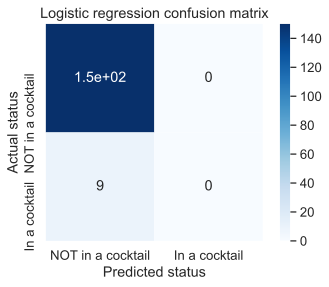

In [794]:
status = ['NOT in a cocktail', 'In a cocktail']

# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(label_val, logit.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=status,
           yticklabels=status)

plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logit_cocktail_ingredient")

In [795]:
lm = LogisticRegression(C = 100)  # C = regularization strength; smaller numbers are stronger
lm.fit(X_tr, label_tr)


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [823]:
#def make_confusion_matrix(model, threshold=0.06, model_type="Logistic Regression"):
def make_confusion_matrix(model, threshold=0.25, model_type="Logistic Regression"):
#def make_confusion_matrix(model, threshold=0.5, model_type="Logistic Regression"):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    label_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    cocktail_confusion = confusion_matrix(label_val, label_predict)
    plt.figure(dpi=80)
    sns.heatmap(cocktail_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=status,
           yticklabels=status);
    plt.title(model_type)
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [824]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_val, label_val)))

The score for logistic regression is
Training:  92.43%
Validation set:  94.34%


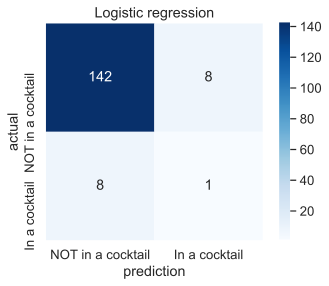

In [825]:
make_confusion_matrix(lm, model_type="Logistic regression")

In [799]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [800]:
knn = KNeighborsClassifier(n_neighbors=20) # set number of neighbors to 20
knn.fit(X_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_val, label_val)))

The score for kNN is
Training:  92.43%
Validation set:  94.34%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


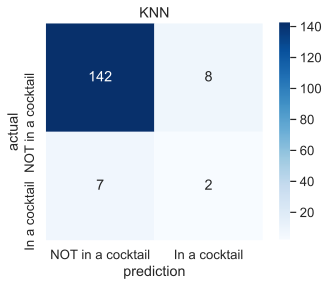

In [801]:
make_confusion_matrix(knn, model_type="KNN")

### Precision and Recall

In [802]:
label_predict = lm.predict(X_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.0000,   Recall: 0.0000


In [816]:
label_predict = (lm.predict_proba(X_val)[:,1] > 0.03)
print("Threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:
Precision: 0.0943,   Recall: 0.5556


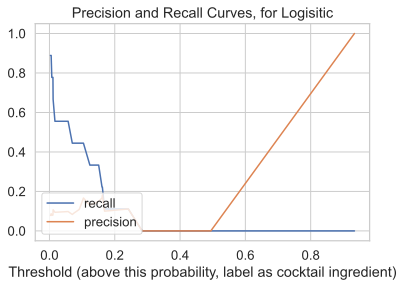

In [817]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, lm.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### F1 score

In [818]:
label_predict = lm.predict(X_val)
f1_score(label_val, label_predict)

0.0

In [819]:
label_predict = (lm.predict_proba(X_val)[:, 1] > 0.06)
f1_score(label_val, label_predict)

0.16666666666666669

### ROC curve

In [773]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_val, lm.predict_proba(X_val)[:,1])

ROC AUC score =  0.7148148148148148


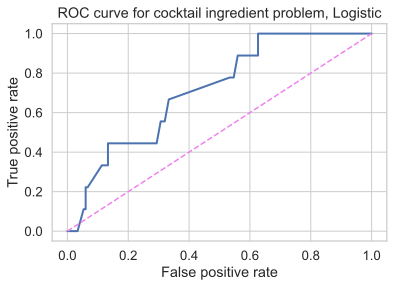

In [757]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, lm.predict_proba(X_val)[:,1]))

In [783]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_val)[:,1])

ROC AUC score, for KNN =  0.7518518518518518


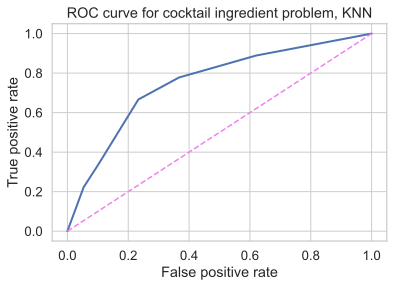

In [784]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_val)[:,1]))

In [233]:
# words = cocktail_ingredients_df.name.stack().str.split("[^\w+]").explode().tolist()
# words

### Find the most common words in the `words` columns and eliminate them (done above)

In [354]:
cocktail_ingredients_df.iloc[250:300, :]

,name,value,in_cocktail,words,ingredient
250,Rosso Vermouth,1,True,"[Rosso, Vermouth]",rosso vermouth
251,Whipped Cream,1,True,"[Whipped, Cream]",cream
252,Grape soda,1,True,"[Grape, soda]",grape
253,Islay single malt Scotch,1,True,"[Islay, single, malt, Scotch]",islay single malt scotch
254,Pomegranate juice,1,True,"[Pomegranate, juice]",pomegranate
255,Fresh Lemon Juice,1,True,"[Fresh, Lemon, Juice]",lemon
256,Apricot,1,True,[Apricot],apricot
257,orange juice,1,True,"[orange, juice]",orange
258,Licorice root,1,True,"[Licorice, root]",licorice
259,Apple schnapps,1,True,"[Apple, schnapps]",apple schnapps


False

### Load food dataframe 

In [321]:
foods_df = pd.read_csv('food_sources/foodb_2020_04_07_csv/Food.csv')
foods_df

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
0,1,Angelica,Angelica keiskei,Angelica is a genus of about 60 species of tal...,NaN,Angelica,1.jpg,image/jpeg,111325.0,2012-04-20 09:29:57 UTC,...,Type 1,2011-02-09 00:37:14 UTC,2019-05-14 18:04:13 UTC,NaN,2.0,False,specific,357850.0,True,FOOD00001
1,2,Savoy cabbage,Brassica oleracea var. sabauda,Savoy cabbage (Brassica oleracea convar. capit...,NaN,Savoy cabbage,2.jpg,image/jpeg,155178.0,2012-04-20 09:39:54 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,1216010.0,True,FOOD00002
2,3,Silver linden,Tilia argentea,Tilia tomentosa (Silver Lime in the UK and Sil...,845789.0,Tilia tomentosa,3.jpg,image/jpeg,56367.0,2012-04-20 09:41:25 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-17 16:19:45 UTC,NaN,NaN,False,specific,NaN,True,FOOD00003
3,4,Kiwi,Actinidia chinensis,"The kiwifruit, often shortened to kiwi in many...",506775.0,Kiwifruit,4.jpg,image/jpeg,110661.0,2012-04-20 09:32:21 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,3625.0,True,FOOD00004
4,5,Allium,Allium,Allium haematochiton is a species of wild onio...,42634.0,Allium haematochiton,5.jpg,image/jpeg,341911.0,2012-04-20 09:37:44 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,4678.0,True,FOOD00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1020,Cape gooseberry,Physalis peruviana,"Physalis peruviana, a plant species of the gen...",NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-01-24 17:05:37 UTC,2020-01-24 17:05:37 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00988
988,1021,Herbal tea,NaN,Herbal teas are the beverages made from the in...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 20:55:17 UTC,2020-03-12 20:55:17 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00989
989,1022,Fish oil,NaN,Fish oil is oil derived from the tissues of oi...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 21:00:02 UTC,2020-03-12 21:00:02 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00990
990,1023,Taco shell,NaN,The hard-shell or crispy taco is a tradition t...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 2,2020-03-12 21:01:58 UTC,2020-03-12 21:01:58 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00991


In [334]:
foods_df['name']=foods_df['name'].str.lower()
foods_df.sample(50)

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
749,775,hot dog,NaN,A hot dog is a sausage served in a sliced bun....,NaN,Hot_dog,775.jpg,image/jpeg,53442.0,2012-04-20 09:42:50 UTC,...,Type 2,2011-12-16 18:05:46 UTC,2019-05-14 18:05:31 UTC,2.0,2.0,False,specific,NaN,False,FOOD00750
297,299,striped bass,Morone saxatilis,"The striped bass (Morone saxatilis), also call...",167680.0,Striped bass,299.jpg,image/jpeg,36282.0,2012-04-20 09:34:02 UTC,...,Type 1,2011-02-09 00:37:31 UTC,2019-05-14 18:04:22 UTC,NaN,NaN,False,specific,34816.0,True,FOOD00298
780,806,pie filling,NaN,NaN,NaN,NaN,806.jpg,image/jpeg,77806.0,2012-04-20 09:29:58 UTC,...,Type 2,2011-12-19 20:52:20 UTC,2019-05-14 18:05:32 UTC,2.0,2.0,False,specific,NaN,False,FOOD00781
306,310,wild boar,Sus scrofa,"Wild boar (Sus scrofa), also known as wild pig...",180722.0,Wild boar,310.jpg,image/jpeg,122002.0,NaN,...,Type 1,2018-01-18 03:18:03 UTC,2019-05-14 18:04:22 UTC,NaN,NaN,False,specific,9823.0,True,FOOD00307
371,377,grouper,Epinephelus,Groupers are fish of any of a number of genera...,167694.0,Grouper,377.jpg,image/jpeg,62622.0,2012-04-20 09:30:40 UTC,...,Type 1,2011-02-09 00:37:38 UTC,2019-05-14 18:05:23 UTC,NaN,NaN,False,specific,94231.0,True,FOOD00372
77,78,wax apple,Eugenia javanica,Syzygium samarangense (syn. Eugenia javanica) ...,27192.0,Wax_apple,78.jpg,image/jpeg,127178.0,2012-04-20 09:33:42 UTC,...,Type 1,2011-02-09 00:37:19 UTC,2019-05-14 18:04:15 UTC,NaN,NaN,False,specific,119950.0,True,FOOD00078
257,258,kai-lan,Brassica oleracea var. alboglabra,Kai-lan (also written as gai-lan) is the Canto...,532650.0,Kai-lan,258.jpg,image/jpeg,76467.0,2012-04-20 09:43:43 UTC,...,Type 1,2011-02-09 00:37:29 UTC,2019-05-17 16:19:45 UTC,NaN,NaN,False,specific,3714.0,True,FOOD00258
429,438,pheasant,Phasianus colchicus,Pheasants refer to several genera within the s...,175905.0,Pheasant,438.jpg,image/jpeg,172968.0,NaN,...,Type 1,2018-01-18 03:18:03 UTC,2019-05-14 18:05:25 UTC,NaN,NaN,False,specific,9054.0,True,FOOD00430
804,832,other bread product,NaN,NaN,NaN,NaN,832.jpg,image/jpeg,1978370.0,2012-04-20 09:43:45 UTC,...,Type 2,2011-12-20 18:04:17 UTC,2019-05-14 18:05:33 UTC,2.0,2.0,False,specific,NaN,False,FOOD00805
314,319,american butterfish,Peprilus triacanthus,"The American butterfish, Peprilus triacanthus,...",172567.0,American butterfish,319.jpg,image/jpeg,2027.0,2012-04-20 09:29:16 UTC,...,Type 1,2011-02-09 00:37:34 UTC,2019-05-14 18:04:22 UTC,NaN,NaN,False,specific,183653.0,True,FOOD00315


In [339]:
foods_df[foods_df['name'].str.contains(' ')].sample(50)

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
225,226,garden onion (var.),Allium cepa var. cepa,NaN,182638.0,NaN,226.jpg,image/jpeg,138437.0,2012-04-23 10:45:33 UTC,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:19 UTC,NaN,2.0,False,specific,4679.0,True,FOOD00226
676,699,fruit gum,NaN,Rowntree's Fruit Gums are circular sweets form...,NaN,Fruit_Gums,699.jpg,image/jpeg,53944.0,2012-04-20 09:38:43 UTC,...,Type 2,2011-12-07 00:12:29 UTC,2019-05-14 18:05:29 UTC,2.0,2.0,False,specific,NaN,False,FOOD00677
258,259,italian oregano,Origanum X majoricum,Italian oregano (<i>Origanum</i> X <i>Majoricu...,NaN,NaN,259.jpg,image/jpeg,93619.0,2012-04-20 09:38:14 UTC,...,Type 1,2011-02-09 00:37:29 UTC,2019-05-14 18:04:21 UTC,NaN,NaN,False,specific,1384207.0,True,FOOD00259
202,203,muscadine grape,Vitis rotundifolia,Muscadine (Vitis rotundifolia) is a grapevine ...,28609.0,Muscadine,203.jpg,image/jpeg,78997.0,2012-04-20 09:36:58 UTC,...,Type 1,2011-02-09 00:37:26 UTC,2019-05-14 18:04:19 UTC,NaN,NaN,False,specific,103349.0,True,FOOD00203
974,1007,pea shoots,NaN,Pea shoots have long been prominent in Asian c...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-01-24 17:05:37 UTC,2020-01-24 17:05:37 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00975
519,531,"clupeinae (herring, sardine, sprat)",Clupeinae,"Clupeinae is a subfamily of herrings, sardines...",551153.0,Clupeinae,531.jpg,image/jpeg,9510.0,2012-04-20 09:29:57 UTC,...,Type 1,2011-02-09 00:37:47 UTC,2019-05-14 18:05:26 UTC,NaN,NaN,False,specific,7948.0,True,FOOD00520
847,878,milk substitute,NaN,A milk substitute is a liquid that replaces mi...,NaN,Milk_substitute,878.jpg,image/jpeg,42023.0,2012-04-20 09:34:20 UTC,...,Type 2,2011-12-22 22:26:59 UTC,2019-05-14 18:05:35 UTC,2.0,2.0,False,specific,NaN,False,FOOD00848
644,664,salad dressing,NaN,"Sauces for salads are often called ""dressings""...",NaN,Salad#Dressings,664.jpg,image/jpeg,42317.0,2012-04-20 09:41:37 UTC,...,Type 2,2011-12-05 16:42:26 UTC,2019-05-14 18:05:29 UTC,2.0,2.0,False,specific,NaN,False,FOOD00645
187,188,"vaccinium (blueberry, cranberry, huckleberry)",Vaccinium,Vaccinium is a genus of shrubs or dwarf shrubs...,23571.0,Vaccinium,188.jpg,image/jpeg,71693.0,2012-04-20 09:36:57 UTC,...,Type 1,2011-02-09 00:37:25 UTC,2019-05-14 18:04:18 UTC,NaN,NaN,False,specific,13749.0,True,FOOD00188
374,380,hippoglossus (common halibut),Hippoglossus,Hippoglossus is a genus of righteye flounders ...,172931.0,Hippoglossus,380.jpg,image/jpeg,59479.0,2012-04-20 09:30:42 UTC,...,Type 1,2011-02-09 00:37:38 UTC,2019-05-14 18:05:24 UTC,NaN,NaN,False,specific,8266.0,True,FOOD00375


In [341]:
cocktail_intredients_merge = pd.merge(cocktail_ingredients_df, foods_df, how='left', left_on='ingredient', right_on='name')
cocktail_intredients_merge.sample(50)


,name_x,value,in_cocktail,words,ingredient,id,name_y,name_scientific,description,itis_id,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
183,Pepsi Cola,2,True,"[Pepsi, Cola]",pepsi cola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,Orgeat Syrup,1,True,"[Orgeat, Syrup]",orgeat,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Peachtree schnapps,2,True,"[Peachtree, schnapps]",peachtree schnapps,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Figs,1,True,[Figs],figs,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,Pisco,2,True,[Pisco],pisco,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,Honey syrup,1,True,"[Honey, syrup]",honey,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,7-up,1,True,[7-up],7-up,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Nutmeg,10,True,[Nutmeg],nutmeg,118.0,nutmeg,Myristica fragrans,The nutmeg tree is any of several species of t...,18125.0,...,Type 1,2011-02-09 00:37:21 UTC,2019-05-14 18:04:16 UTC,NaN,NaN,False,specific,51089.0,True,FOOD00118
42,Club soda,12,True,"[Club, soda]",club,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,Vanilla syrup,1,True,"[Vanilla, syrup]",vanilla,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
foods_df[foods_df['name'] == 'pineapple']

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
11,12,pineapple,Ananas comosus,"The Pineapple (Ananas comosus), named for its ...",42335.0,Pineapple,12.jpg,image/jpeg,46902.0,2012-04-20 09:38:46 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,4615.0,True,FOOD00012


In [362]:
foods_df.iloc[11, :]['name']

'pineapple'

In [353]:
compare_string = cocktail_ingredients_df[cocktail_ingredients_df['ingredient']=='pineapple']['ingredient']
compare_string

95    pineapple
Name: ingredient, dtype: object

In [157]:
merge_df = pd.merge(cocktail_ingredients_df, foods_df, how='outer', left_index=True, right_on='name')

merge_df[ merge_df['in_cocktail'].isnull()]

,value,in_cocktail,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
0.0,NaN,NaN,1.0,Angelica,Angelica keiskei,Angelica is a genus of about 60 species of tal...,NaN,Angelica,1.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:14 UTC,2019-05-14 18:04:13 UTC,NaN,2.0,False,specific,357850.0,True,FOOD00001
1.0,NaN,NaN,2.0,Savoy cabbage,Brassica oleracea var. sabauda,Savoy cabbage (Brassica oleracea convar. capit...,NaN,Savoy cabbage,2.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,1216010.0,True,FOOD00002
2.0,NaN,NaN,3.0,Silver linden,Tilia argentea,Tilia tomentosa (Silver Lime in the UK and Sil...,845789.0,Tilia tomentosa,3.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-17 16:19:45 UTC,NaN,NaN,False,specific,NaN,True,FOOD00003
3.0,NaN,NaN,4.0,Kiwi,Actinidia chinensis,"The kiwifruit, often shortened to kiwi in many...",506775.0,Kiwifruit,4.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,3625.0,True,FOOD00004
4.0,NaN,NaN,5.0,Allium,Allium,Allium haematochiton is a species of wild onio...,42634.0,Allium haematochiton,5.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,4678.0,True,FOOD00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987.0,NaN,NaN,1020.0,Cape gooseberry,Physalis peruviana,"Physalis peruviana, a plant species of the gen...",NaN,NaN,NaN,NaN,...,Type 1,2020-01-24 17:05:37 UTC,2020-01-24 17:05:37 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00988
988.0,NaN,NaN,1021.0,Herbal tea,NaN,Herbal teas are the beverages made from the in...,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 20:55:17 UTC,2020-03-12 20:55:17 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00989
989.0,NaN,NaN,1022.0,Fish oil,NaN,Fish oil is oil derived from the tissues of oi...,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 21:00:02 UTC,2020-03-12 21:00:02 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00990
990.0,NaN,NaN,1023.0,Taco shell,NaN,The hard-shell or crispy taco is a tradition t...,NaN,NaN,NaN,NaN,...,Type 2,2020-03-12 21:01:58 UTC,2020-03-12 21:01:58 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00991


In [159]:
merge_df[ merge_df['in_cocktail']== True].head(50)

,value,in_cocktail,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
624.0,101.0,True,642.0,Gin,NaN,Gin is a spirit which derives its predominant ...,NaN,Gin,642.jpg,image/jpeg,...,Type 2,2011-12-02 22:06:02 UTC,2019-05-14 18:05:28 UTC,2.0,2.0,False,specific,NaN,True,FOOD00625
621.0,94.0,True,639.0,Vodka,NaN,Vodka is a distilled beverage composed primari...,NaN,Vodka,639.jpg,image/jpeg,...,Type 2,2011-12-02 17:29:03 UTC,2019-05-14 18:05:28 UTC,2.0,2.0,False,specific,NaN,True,FOOD00622
650.0,51.0,True,670.0,Sugar,NaN,Sugar is the generalised name for a class of c...,NaN,Sugar,670.jpg,image/jpeg,...,Type 2,2011-12-05 17:07:39 UTC,2019-12-11 19:38:00 UTC,2.0,2.0,False,specific,NaN,False,FOOD00651
NaN,50.0,True,NaN,Orange juice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53.0,44.0,True,54.0,Lemon,Citrus limon,The lemon is a small evergreen tree native to ...,28885.0,Lemon,54.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:17 UTC,2019-05-14 18:04:15 UTC,NaN,NaN,False,specific,2708.0,True,FOOD00054
NaN,43.0,True,NaN,Lemon juice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,43.0,True,NaN,Light rum,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,42.0,True,NaN,Amaretto,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,37.0,True,NaN,Grenadine,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,37.0,True,NaN,Ice,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
merge_df[ merge_df['in_cocktail']!= True].iloc[200:250, :]

,value,in_cocktail,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
220.0,NaN,NaN,221.0,Oval-leaf huckleberry,Vaccinium ovalifolium,Vaccinium ovalifolium (commonly known as Alask...,23607.0,Vaccinium_ovalifolium,221.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:19 UTC,NaN,NaN,False,specific,190544.0,True,FOOD00221
221.0,NaN,NaN,222.0,Evergreen huckleberry,Vaccinium ovatum,Vaccinium ovatum is a species of flowering shr...,23608.0,Vaccinium ovatum,222.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:19 UTC,NaN,NaN,False,specific,84019.0,True,FOOD00222
222.0,NaN,NaN,223.0,Red huckleberry,Vaccinium parvifolium,Red Huckleberry (Vaccinium parvifolium) is a s...,23612.0,Vaccinium parvifolium,223.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:19 UTC,NaN,NaN,False,specific,180766.0,True,FOOD00223
223.0,NaN,NaN,224.0,Longan,Dimocarpus longan,"Dimocarpus longan, commonly known as the longa...",506072.0,Longan,224.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:19 UTC,NaN,NaN,False,specific,128017.0,True,FOOD00224
224.0,NaN,NaN,225.0,Macadamia nut (M. tetraphylla),Macadamia tetraphylla,Macadamia tetraphylla is a tree in the Proteac...,506560.0,Macadamia tetraphylla,225.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:19 UTC,NaN,NaN,False,specific,512563.0,True,FOOD00225
225.0,NaN,NaN,226.0,Garden onion (var.),Allium cepa var. cepa,NaN,182638.0,NaN,226.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:19 UTC,NaN,2.0,False,specific,4679.0,True,FOOD00226
226.0,NaN,NaN,227.0,Summer grape,Vitis aestivalis,Vitis aestivalis (Summer Grape) is a species o...,28607.0,Vitis aestivalis,227.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:19 UTC,NaN,NaN,False,specific,3605.0,True,FOOD00227
227.0,NaN,NaN,228.0,Fox grape,Vitis labrusca,Vitis labrusca (fox grape) is a species of gra...,28608.0,Vitis_labrusca,228.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:19 UTC,NaN,NaN,False,specific,103355.0,True,FOOD00228
228.0,NaN,NaN,229.0,Nectarine,Prunus persica var. nucipersica,The variety P. persica var. nucipersica (or va...,530965.0,Nectarine#Nectarines,229.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:20 UTC,NaN,NaN,False,specific,323851.0,True,FOOD00229
229.0,NaN,NaN,230.0,Peach (var.),Prunus persica var. persica,NaN,530964.0,NaN,230.jpg,image/jpeg,...,Type 1,2011-02-09 00:37:27 UTC,2019-05-14 18:04:20 UTC,NaN,NaN,False,specific,323852.0,True,FOOD00230
